## Prediction Analysis and XAI(Explainable AI)

#### Note::: This file is still under development and not really organised

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_artists = pd.read_csv('../dataset/artists.csv',sep=None, index_col=0, engine='python', encoding='utf-8')
print(f"After loading: {df_artists.shape}")
df_artists.head()

After loading: (104, 13)


,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
id_author,,,,,,,,,,,,,
ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_artists

,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
id_author,,,,,,,,,,,,,
ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ART98118784,tormento,M,1975-09-06,Reggio Calabria,Italia,"rapper, cantautore e beatmaker italiano (1975-)",NaN,NaN,Reggio Calabria,Calabria,Italia,38.103539,15.639756
ART15560128,vacca,M,1979-10-21,Cagliari,Italia,rapper italiano,2001-01-01,NaN,Cagliari,Sardegna,Italia,39.217199,9.113311
ART57587384,willie peyote,M,1985-08-28,Torino,Italia,rapper e cantautore italiano (1985-),2004-01-01,NaN,Torino,Piemonte,Italia,45.067755,7.682489


In [4]:
df_artists.dtypes

name             object
gender           object
birth_date       object
birth_place      object
nationality      object
description      object
active_start     object
active_end      float64
province         object
region           object
country          object
latitude        float64
longitude       float64
dtype: object

#### We first have to clean the artists whose regions are null

In [5]:
df_artists.isna().sum()


name              0
gender            0
birth_date       31
birth_place      32
nationality      33
description      18
active_start     54
active_end      104
province         34
region           36
country          34
latitude         32
longitude        32
dtype: int64

In [6]:
##### I have to remove some column because i do not need them for the prediction

unneeded_columns = ['gender', 'birth_date', 'birth_place', 'nationality', 'description', 'description', 'active_start', 'active_end', 'country', 'latitude', 'longitude', 'province']
# Drop only columns that actually exist in df_artists to avoid KeyError
cols_to_drop = [c for c in unneeded_columns if c in df_artists.columns]
print(f"Before dropping columns: {df_artists.shape}")
print(f"Columns to drop: {cols_to_drop}")
if cols_to_drop:
	df_artists = df_artists.drop(columns=cols_to_drop)
else:
	# nothing to drop; keep a copy to avoid accidental views on empty frames
	df_artists = df_artists.copy()
print(f"After dropping columns: {df_artists.shape}")

Before dropping columns: (104, 13)
Columns to drop: ['gender', 'birth_date', 'birth_place', 'nationality', 'description', 'description', 'active_start', 'active_end', 'country', 'latitude', 'longitude', 'province']
After dropping columns: (104, 2)


In [7]:
df_artists

,name,region
id_author,,
ART82291002,99 posse,NaN
ART53496045,achille lauro,Veneto
ART18853907,alfa,NaN
ART64265460,anna pepe,NaN
ART75741740,articolo 31,NaN
...,...,...
ART98118784,tormento,Calabria
ART15560128,vacca,Sardegna
ART57587384,willie peyote,Piemonte


In [8]:
# Check the current state and shape
print(f"Current shape: {df_artists.shape}")
print(f"\nColumns: {df_artists.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_artists.head(10))
print(f"\nNull values per column:")
print(df_artists.isnull().sum())

Current shape: (104, 2)

Columns: ['name', 'region']

First few rows:
                      name     region
id_author                            
ART82291002       99 posse        NaN
ART53496045  achille lauro     Veneto
ART18853907           alfa        NaN
ART64265460      anna pepe        NaN
ART75741740    articolo 31        NaN
ART24123617        babaman  Lombardia
ART40229749         baby k        NaN
ART56320683  bassi maestro  Lombardia
ART19605256           beba        NaN
ART02666525        bigmama        NaN

Null values per column:
name       0
region    36
dtype: int64


In [9]:
df_artists.drop(columns='name', inplace=True)

In [10]:
df_artists.isnull().sum()

region    36
dtype: int64

In [11]:
print(f"Before dropna: {df_artists.shape}")
print(f"Null values before dropna:\n{df_artists.isnull().sum()}")
df_artists.dropna(inplace=True)
print(f"After dropna: {df_artists.shape}")

Before dropna: (104, 1)
Null values before dropna:
region    36
dtype: int64
After dropna: (68, 1)


In [12]:
df_artists.head()

,region
id_author,
ART53496045,Veneto
ART24123617,Lombardia
ART56320683,Lombardia
ART27304446,Puglia
ART70825116,Campania


### Now we can create macro-zones column

In [13]:
from_regions_to_macro_zones = {
    # North
    'Lombardia': 'North',
    'Piemonte': 'North', 
    'Veneto': 'North', 
    'Liguria': 'North',
    
    # Campania
    'Campania': 'Campania',
    
    #Lazio
    'Lazio': 'Lazio',
    
    #Sardegna
    'Sardegna': 'Sardegna',
    
    #Center
    'Toscana':'Center',
    'Emilia-Romagna':'Center',
    'Marche':'Center',
    
    #South
    'Puglia': 'South', 
    'Sicilia': 'South', 
    'Calabria': 'South'  
}


In [14]:
### We are now comparing the regions with the marcozones while also creating the marcozones column
df_artists['marco-zones'] = df_artists['region'].map(from_regions_to_macro_zones)

In [15]:
df_artists.head(10)

,region,marco-zones
id_author,,
ART53496045,Veneto,North
ART24123617,Lombardia,North
ART56320683,Lombardia,North
ART27304446,Puglia,South
ART70825116,Campania,Campania
ART67409252,Liguria,North
ART71969350,Campania,Campania
ART78209349,Campania,Campania
ART46851094,Liguria,North


## We then explore the tracks dataset

In [16]:
df_tracks = pd.read_csv('../dataset/tracks.csv',sep=None, engine='python', encoding='utf-8')
df_tracks.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


In [17]:
df_tracks.shape

(11166, 45)

In [18]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

In [19]:
df_tracks.columns

Index(['id', 'id_artist', 'name_artist', 'full_title', 'title',
       'featured_artists', 'primary_artist', 'language', 'album',
       'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words',
       'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens',
       'tokens_per_sent', 'char_per_tok', 'lexical_density',
       'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms',
       'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness',
       'album_name', 'album_release_date', 'album_type', 'disc_number',
       'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image',
       'id_album', 'lyrics', 'modified_popularity'],
      dtype='object')

#### We do not need these columns because they wont give clue to our model for prediction
#### If the model is not performing well, then we shall change the clues and see which one would perform well and keep them.

In [20]:
###### Let's remove columns that are not necessary here
columns_not_necessary_tracks = ['id', 'full_title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews',
                                'month', 'day', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'album_image',
                                'id_album', 'modified_popularity', 'popularity', 'title', 'swear_IT_words', 'swear_EN_words', 'lyrics'
                                ]
df_tracks=df_tracks.drop(columns=columns_not_necessary_tracks)

In [21]:
df_tracks.head()

,id_artist,name_artist,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,...,rolloff,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit
0,ART04205421,Rosa Chemical,13,6,2021.0,102.0,911.0,8.931373,4.170455,0.575284,...,2895.7767,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,207761.0,True
1,ART04205421,Rosa Chemical,9,12,2020.0,56.0,675.0,12.053571,4.280851,0.648936,...,3378.4605,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,207761.0,True
2,ART04205421,Rosa Chemical,16,12,2021.0,88.0,758.0,8.613636,4.075251,0.556856,...,2037.4847,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,193544.0,True
3,ART04205421,Rosa Chemical,8,3,2019.0,37.0,382.0,10.324324,4.023881,0.534328,...,1156.3781,1.5499,0.1971,0.0436,0.8764,14.2956,2984.6109,20.5067,169000.0,True
4,ART04205421,Rosa Chemical,1,0,2020.0,48.0,429.0,8.937500,3.922857,0.491429,...,1693.4542,1.0886,0.2369,0.0695,0.8571,36.6951,1572.0499,25.3407,194779.0,True


In [22]:
df_tracks.isna().sum()

id_artist                 0
name_artist               0
swear_IT                  0
swear_EN                  0
year                    400
n_sentences              76
n_tokens                 76
tokens_per_sent          76
char_per_tok             76
lexical_density          76
avg_token_per_clause     76
bpm                      64
centroid                 64
rolloff                  64
flux                     64
rms                      64
zcr                      64
flatness                 64
spectral_complexity      64
pitch                    64
loudness                 64
duration_ms              78
explicit                 78
dtype: int64

In [23]:
df_tracks.dropna(inplace=True)

In [24]:
df_tracks.isna().sum()

id_artist               0
name_artist             0
swear_IT                0
swear_EN                0
year                    0
n_sentences             0
n_tokens                0
tokens_per_sent         0
char_per_tok            0
lexical_density         0
avg_token_per_clause    0
bpm                     0
centroid                0
rolloff                 0
flux                    0
rms                     0
zcr                     0
flatness                0
spectral_complexity     0
pitch                   0
loudness                0
duration_ms             0
explicit                0
dtype: int64

In [25]:
df_tracks.shape

(10634, 23)

In [26]:
df_tracks.head()

,id_artist,name_artist,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,...,rolloff,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit
0,ART04205421,Rosa Chemical,13,6,2021.0,102.0,911.0,8.931373,4.170455,0.575284,...,2895.7767,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,207761.0,True
1,ART04205421,Rosa Chemical,9,12,2020.0,56.0,675.0,12.053571,4.280851,0.648936,...,3378.4605,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,207761.0,True
2,ART04205421,Rosa Chemical,16,12,2021.0,88.0,758.0,8.613636,4.075251,0.556856,...,2037.4847,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,193544.0,True
3,ART04205421,Rosa Chemical,8,3,2019.0,37.0,382.0,10.324324,4.023881,0.534328,...,1156.3781,1.5499,0.1971,0.0436,0.8764,14.2956,2984.6109,20.5067,169000.0,True
4,ART04205421,Rosa Chemical,1,0,2020.0,48.0,429.0,8.937500,3.922857,0.491429,...,1693.4542,1.0886,0.2369,0.0695,0.8571,36.6951,1572.0499,25.3407,194779.0,True


### Then we merge the dataset to get only one final dataset for modeling

In [27]:
final_model_df = pd.merge(
    df_tracks,
    df_artists,
    left_on='id_artist',
    right_on='id_author'
)

In [28]:
final_model_df.head()

,id_artist,name_artist,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,...,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit,region,marco-zones
0,ART04205421,Rosa Chemical,13,6,2021.0,102.0,911.0,8.931373,4.170455,0.575284,...,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,207761.0,True,Piemonte,North
1,ART04205421,Rosa Chemical,9,12,2020.0,56.0,675.0,12.053571,4.280851,0.648936,...,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,207761.0,True,Piemonte,North
2,ART04205421,Rosa Chemical,16,12,2021.0,88.0,758.0,8.613636,4.075251,0.556856,...,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,193544.0,True,Piemonte,North
3,ART04205421,Rosa Chemical,8,3,2019.0,37.0,382.0,10.324324,4.023881,0.534328,...,0.1971,0.0436,0.8764,14.2956,2984.6109,20.5067,169000.0,True,Piemonte,North
4,ART04205421,Rosa Chemical,1,0,2020.0,48.0,429.0,8.937500,3.922857,0.491429,...,0.2369,0.0695,0.8571,36.6951,1572.0499,25.3407,194779.0,True,Piemonte,North


In [29]:
## For our final dataset, we have to drop irrelevant column that wont add value such as 
# Id_artist, name_artist, and their respective region since we have their macro-zones
final_model_df.drop(columns=["id_artist", "name_artist", "region"], inplace=True)

In [30]:
final_model_df.shape

(7644, 22)

In [31]:
final_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7644 entries, 0 to 7643
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   swear_IT              7644 non-null   int64  
 1   swear_EN              7644 non-null   int64  
 2   year                  7644 non-null   object 
 3   n_sentences           7644 non-null   float64
 4   n_tokens              7644 non-null   float64
 5   tokens_per_sent       7644 non-null   float64
 6   char_per_tok          7644 non-null   float64
 7   lexical_density       7644 non-null   float64
 8   avg_token_per_clause  7644 non-null   float64
 9   bpm                   7644 non-null   float64
 10  centroid              7644 non-null   float64
 11  rolloff               7644 non-null   float64
 12  flux                  7644 non-null   float64
 13  rms                   7644 non-null   float64
 14  zcr                   7644 non-null   float64
 15  flatness             

In [32]:
final_model_df.isnull().sum()

swear_IT                0
swear_EN                0
year                    0
n_sentences             0
n_tokens                0
tokens_per_sent         0
char_per_tok            0
lexical_density         0
avg_token_per_clause    0
bpm                     0
centroid                0
rolloff                 0
flux                    0
rms                     0
zcr                     0
flatness                0
spectral_complexity     0
pitch                   0
loudness                0
duration_ms             0
explicit                0
marco-zones             0
dtype: int64

In [33]:
final_model_df.columns

Index(['swear_IT', 'swear_EN', 'year', 'n_sentences', 'n_tokens',
       'tokens_per_sent', 'char_per_tok', 'lexical_density',
       'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms',
       'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness',
       'duration_ms', 'explicit', 'marco-zones'],
      dtype='object')

In [34]:
##### Encoxde to the binary explicit columns
final_model_df['explicit'] = final_model_df['explicit'].astype(int)

In [35]:
## Lets deal with the year having a string with int value
final_model_df['year'] = pd.to_numeric(final_model_df['year'], errors='coerce')
# Fill NaN values with the median year
median_year = final_model_df['year'].median()
final_model_df['year'].fillna(median_year, inplace=True)

/tmp/ipykernel_13246/2508288120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_model_df['year'].fillna(median_year, inplace=True)


In [36]:
final_model_df.head(10)

,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,avg_token_per_clause,bpm,...,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit,marco-zones
0,13,6,2021.0,102.0,911.0,8.931373,4.170455,0.575284,8.133929,135.32,...,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,207761.0,1,North
1,9,12,2020.0,56.0,675.0,12.053571,4.280851,0.648936,12.500000,129.37,...,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,207761.0,1,North
2,16,12,2021.0,88.0,758.0,8.613636,4.075251,0.556856,8.422222,133.68,...,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,193544.0,1,North
3,8,3,2019.0,37.0,382.0,10.324324,4.023881,0.534328,6.701754,162.22,...,1.5499,0.1971,0.0436,0.8764,14.2956,2984.6109,20.5067,169000.0,1,North
4,1,0,2020.0,48.0,429.0,8.937500,3.922857,0.491429,8.411765,105.87,...,1.0886,0.2369,0.0695,0.8571,36.6951,1572.0499,25.3407,194779.0,1,North
5,2,0,2020.0,62.0,387.0,6.241935,4.160606,0.506061,6.450000,92.02,...,1.0737,0.2334,0.0463,0.8943,23.0539,1943.1810,25.2680,200329.0,1,North
6,5,2,2072.0,82.0,680.0,8.292683,3.817680,0.438306,12.142857,129.82,...,1.2172,0.2632,0.0708,0.8592,29.9563,2111.8930,29.2586,171230.0,1,North
7,7,13,2098.0,82.0,657.0,8.012195,4.031373,0.535294,10.265625,129.95,...,1.3638,0.2576,0.0852,0.8193,36.5045,2137.0455,28.7634,168513.0,1,North
8,0,2,2023.0,82.0,584.0,7.121951,3.935841,0.537611,11.018868,124.14,...,1.2137,0.2573,0.0959,0.8385,40.9769,1861.3738,28.0790,178080.0,1,North
9,4,5,2020.0,50.0,589.0,11.780000,3.851508,0.554524,9.349206,154.92,...,1.0910,0.2157,0.0662,0.8995,30.1906,1757.9368,22.5514,188534.0,1,North


In [37]:
final_model_df.shape

(7644, 22)

## Final Data Preparation

In [38]:
## Define the features and target variable
X = final_model_df.iloc[:, :-1]
y = final_model_df.iloc[: , -1]


#### Check the missing values to both features and the target variables 

In [39]:
X.isna().sum()

swear_IT                0
swear_EN                0
year                    0
n_sentences             0
n_tokens                0
tokens_per_sent         0
char_per_tok            0
lexical_density         0
avg_token_per_clause    0
bpm                     0
centroid                0
rolloff                 0
flux                    0
rms                     0
zcr                     0
flatness                0
spectral_complexity     0
pitch                   0
loudness                0
duration_ms             0
explicit                0
dtype: int64

In [40]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7639    False
7640    False
7641    False
7642    False
7643    False
Name: marco-zones, Length: 7644, dtype: bool

In [57]:
final_model_df.to_csv('../dataset/final_model_data.csv', index=False)


In [56]:
df_exported = pd.read_csv('../dataset/final_model_data.csv')
df_exported.head()

,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,avg_token_per_clause,bpm,...,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit,marco-zones
0,13,6,2021.0,102.0,911.0,8.931373,4.170455,0.575284,8.133929,135.32,...,1.4499,0.1786,0.1046,0.8202,25.7148,2311.1779,17.8675,207761.0,1,North
1,9,12,2020.0,56.0,675.0,12.053571,4.280851,0.648936,12.500000,129.37,...,1.3533,0.2020,0.1175,0.6739,29.1089,1892.1924,21.4595,207761.0,1,North
2,16,12,2021.0,88.0,758.0,8.613636,4.075251,0.556856,8.422222,133.68,...,1.3822,0.2552,0.0800,0.7842,26.9762,2484.3503,29.4590,193544.0,1,North
3,8,3,2019.0,37.0,382.0,10.324324,4.023881,0.534328,6.701754,162.22,...,1.5499,0.1971,0.0436,0.8764,14.2956,2984.6109,20.5067,169000.0,1,North
4,1,0,2020.0,48.0,429.0,8.937500,3.922857,0.491429,8.411765,105.87,...,1.0886,0.2369,0.0695,0.8571,36.6951,1572.0499,25.3407,194779.0,1,North


### Data splitting and scaling

In [42]:
## We have to import the necessary libraries for splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
## Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(6115, 21) (6115,)


In [44]:
X_train.head(100)

,swear_IT,swear_EN,year,n_sentences,n_tokens,tokens_per_sent,char_per_tok,lexical_density,avg_token_per_clause,bpm,...,rolloff,flux,rms,zcr,flatness,spectral_complexity,pitch,loudness,duration_ms,explicit
1513,5,1,2004.0,46.0,402.0,8.739130,4.113158,0.550000,6.700000,95.93,...,1738.4237,1.5229,0.1989,0.0694,0.9146,22.6502,2384.7780,20.4648,230160.0,0
216,5,0,2022.0,59.0,615.0,10.423729,4.159774,0.530075,6.029412,139.85,...,1796.6273,1.3884,0.1904,0.0621,0.9066,22.6396,2455.7929,19.8091,172862.0,1
5879,4,0,2019.0,62.0,496.0,8.000000,3.907990,0.411622,9.725490,99.89,...,1106.1983,1.1181,0.2857,0.0489,0.8749,33.8383,2110.9845,32.4537,163350.0,1
5169,3,0,2019.0,73.0,536.0,7.342466,3.953441,0.526316,4.429752,110.97,...,1328.9734,1.1779,0.2223,0.0533,0.9444,28.2490,2459.0852,22.9319,209706.0,1
421,0,0,2016.0,42.0,432.0,10.285714,3.961259,0.474576,6.967742,161.74,...,1458.7013,1.1031,0.1676,0.0545,0.8848,21.7908,1937.6262,16.8968,206186.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,4,0,2010.0,58.0,534.0,9.206897,4.345631,0.493204,5.505155,95.49,...,2037.8156,1.4077,0.2602,0.0750,0.8530,32.6883,1927.4971,28.2146,165128.0,1
2317,0,0,2080.0,84.0,521.0,6.202381,4.431767,0.539150,5.158416,107.98,...,697.8745,1.4583,0.3295,0.0285,0.9358,26.1445,3027.1165,39.7323,214443.0,0
4550,1,0,2018.0,41.0,351.0,8.560976,4.164223,0.472141,5.754098,104.70,...,1727.0588,1.1818,0.1969,0.0657,0.9135,30.2744,2107.2394,19.5343,147800.0,1
7118,4,0,2012.0,52.0,464.0,8.923077,3.940191,0.488038,7.365079,94.01,...,1905.7454,1.1587,0.1348,0.0718,0.8796,22.6883,1658.3791,11.8783,262960.0,0


In [45]:
## Data scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)

X_test = scaler.transform(X_test.values)

In [46]:
X_test

array([[-0.68151814, -0.30064375,  0.32703134, ...,  0.3763087 ,
        -0.29859031,  0.96196561],
       [-0.68151814, -0.30064375, -1.37749373, ...,  0.806969  ,
        -0.9055408 ,  0.96196561],
       [ 2.59073216, -0.30064375, -0.33085553, ..., -1.0950393 ,
        -0.30582541,  0.96196561],
       ...,
       [-0.68151814, -0.30064375, -1.34758978, ..., -0.46918505,
        -0.20826652,  0.96196561],
       [-0.68151814, -0.30064375,  0.08779975, ...,  0.45088859,
        -0.27696615,  0.96196561],
       [ 0.68191948, -0.30064375, -1.85595691, ...,  0.90514573,
         0.72737388, -1.0395382 ]], shape=(1529, 21))

# Model Predictions  

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=42)

regressor.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

Classification Report:
               precision    recall  f1-score   support

    Campania       0.40      0.10      0.16       234
      Center       0.00      0.00      0.00        43
       Lazio       0.33      0.00      0.01       214
       North       0.55      0.97      0.70       834
    Sardegna       0.00      0.00      0.00       109
       South       0.27      0.03      0.06        95

    accuracy                           0.55      1529
   macro avg       0.26      0.18      0.15      1529
weighted avg       0.43      0.55      0.41      1529



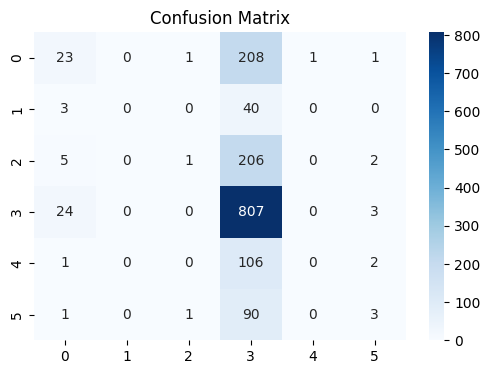

In [48]:

from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

y_pred = regressor.predict(X_test)

regressor.score(X_test, y_test)

cm = confusion_matrix(y_test, y_pred)

metrics_report = classification_report(y_test, y_pred)
print("Classification Report:\n", metrics_report)
plt.figure(figsize=(6,4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [49]:
regressor.score(X_test, y_test)

0.5454545454545454

### Decision Tree

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
classifier.predict(X_test)

array(['North', 'North', 'Campania', ..., 'Campania', 'North', 'North'],
      shape=(1529,), dtype=object)

/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/dio/Public/courses/Data Mining/labs/italian-rap-songs/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

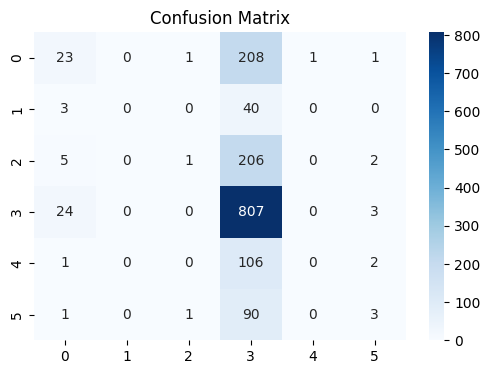

In [52]:
cmatrix = confusion_matrix(y_test, y_pred)

metrics_report = classification_report(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [53]:
classifier.score(X_test, y_test)

0.5088293001962066

### Neural Network